<a href="https://colab.research.google.com/github/FoleyLab/gmgauge/blob/main/Goepper_Mayer_Gauge_Episode_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook can be used to simulate a SPR biosensor substrate.  For a quick overview of how such a biosensor works, please see [this video](https://youtu.be/sM-VI3alvAI). 

This notebook will import the wptherml library, create a sensing substrate that includes a glass prism layer, a thin metal sensing layer, and a superstrate layer.  We will refer to the refractive index of the superstrate layer as $\eta_S$, and we will assume it is real-valued and independent of wavelength (unlike the metal layer,
which is complex and wavelength-dependent).  

A key question that we can address by such a simulation is "How sensitive is a given substrate?".  The way we can quantify the 
sensitivity of an SPR biosensor is by the change in observed resonance angle with the change in the refractive index of the superstrate,
\begin{equation}
S = \frac{\partial \theta_R}{\partial \eta_S}.
\end{equation}
The basic idea is that binding of an analyte (such as the SARS-COV-2 virus) in the superstrate layer to the metal layer (which
can happen if the metal layer is appropriately functionalized) will 
increase the refractive index of the superstrate layer $\eta_S$, which will then increase the resonance angle $\theta_R$.

One way to compute the sensitivity of a substrate is to compute the reflectance
of a substrate where the superstrate layer has refractive index $\eta_S$ 
and note the angle of the reflectance minimum angle $\theta_R$, and then
compute the reflectance of a substrate where the superstrate layer has a 
refractive index $\eta_S + \delta$, where $\delta$ is some small number, and note the reflectance minimum angle $\theta^{'}_R$.  The sensitivity can then 
be defined as
\begin{equation}
S = \frac{\theta^{'}_R - \theta_R}{\delta}.
\end{equation}

The following notebook will demonstrate such a series of 
calculations.

In [2]:
### Install wptherml - beta version supports additional materials! 
!pip install wptherml==1.11b0
### Import WPTHERML class!
from wptherml.wpml import multilayer
### import pyplot and numpy for plotting and data analysis
from matplotlib import pyplot as plt
import numpy as np


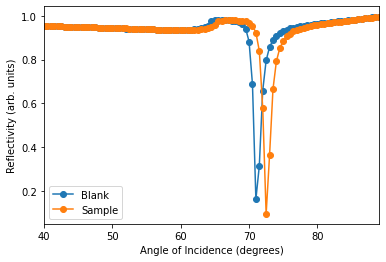

Theta_R is  71.0 degrees
Theta_R' is  72.50000000000001 degrees
Sensitivity is  150.00000000000082 deg/RI unit


In [4]:
### Specify features of the sensing substrate you 
### want to simulate
structure = {
        ### Most materials are specified by their chemical formula
        ### e.g. gold is 'Au' and glass is 'SiO2';
        ### however, air is specified by 'Air'
        'Material_List': ['SiO2', 'Au', 'Air'],

        ### specify the thicknesses in meters for the middle layers
        ### the terminal layers get a thickness of '0' for 
        ### reasons of convention
        'Thickness_List': [0, 50e-9,  0],


        ### specify the range of wavelengths you'd like to simulate
        ### in meters... this is not terribly critical for the SPR 
        ### simulations because you will specify a specific wavelength later
        ### when you compute the angle scan!
        'Lambda_List': [200e-9, 1000e-9, 5000],

        ### These keywords are not relevant for this calculation
        'Gradient_List': [1],
        'Temperature': 300
        }

### create two different substrates
### we will call one blank and one sample
spr_blank = multilayer(structure)
### one with sample on it
spr_sample = multilayer(structure)

### define a refractive index of superstrate
eta_S = 1.33+0j

### define a small number delta to increase the RI of the superstrate by... 
### in practice, binding of an analyte to the funtionalized 
### surface will increase the effective refractive index above
### the surface by a small amount.
delta = 0.01


### for the blank, make the superstrate layer (layer 2) have a RI of water
spr_blank.layer_static_ri(2,eta_S)
### for sample, make layer 2 have the RI of slightly larger than water
spr_sample.layer_static_ri(2,eta_S + delta)

### use the angular_fresnel method of the multilayer class to compute 
### the reflectivity vs angle for the gold_slab structure at a specified wavelength in meters
spr_blank.angular_fresnel(650e-9)
spr_sample.angular_fresnel(650e-9)



### now we can plot the reflectance of the blank and the sample
plt.plot(spr_blank.theta_array*180./np.pi, spr_blank.r_vs_theta, marker='o', label="Blank")
plt.plot(spr_blank.theta_array*180./np.pi, spr_sample.r_vs_theta, marker='o', label="Sample")
plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(40,89)
plt.legend()
plt.show()

### find the location of the minimum reflectance (theta_R) for the blank
blank_min = np.argmin(spr_blank.r_vs_theta)
### find the location of the minimum relflectance (theta_R) for the sample
sample_min = np.argmin(spr_sample.r_vs_theta)

### print out the minimum angle for the blank
print("Theta_R is ",spr_blank.theta_array[blank_min] * 180/np.pi, "degrees")

### print out the minimum angle for the sample
print("Theta_R' is ",spr_blank.theta_array[sample_min] * 180/np.pi,"degrees")

### compute the sensitivity and print it
S = (spr_blank.theta_array[sample_min] - spr_blank.theta_array[blank_min]) * 180. / (np.pi * delta)
print("Sensitivity is ",S, "deg/RI unit")

### Question 1: 
How does the sensitivity compare if gold is used as the film material instead of silver?  How does the sensitivity compare if aluminum is used instead of silver?  Note that the material for the film layer can be changed through the 

`'Material_List': ['SiO2', 'Ag', 'Air'],` 


line, and that gold is specified by 'Au' and aluminum is specified by 'Al'.  Assume that the wavelength $\lambda = 650$ nm for all materials.


### Question 2: 
How does the sensitivity compare for silver if a the wavelength $\lambda = 500$ nm?  How does the sensitivity for compare for silver if the wavelength $\lambda = 800$ nm?  Note that the lines

`spr_blank.angular_fresnel(650e-9)` 

and

`spr_sample.angular_fresnel(650e-9)`

set $\lambda = 650$ nm.

### Question 3: 
How does the sensitivity compare for silver if the film thickness is 20 nm instead of 50 nm?  How does the sensitivity compare for silver if the film thickness is 100 nm instead of 50 nm?  The film thickness is controlled through the line:

`'Thickness_List': [0, 50e-9,  0],`




